<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum_03/"

In [3]:
#Membaca file csv menggunakan pandas
import pandas as pd

#Buat data frame read data
df = pd.read_csv(path +'/Data/socr.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [4]:
#mencari Informasi umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [5]:
#Menghitung statistik deskriptif pada kolom numeric dengan describe
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Konversi data menjadi cm dan kg

In [6]:
df1 = (
    df[["Height(Inches)","Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,  #in-> cm
        berat_kg=lambda d: d["berat_kg"] * 0.453592  #lb-> kg
    )
    .round ({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()


,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [7]:
from sklearn.model_selection import train_test_split

x = df1[["tinggi_cm"]]
y = df1["berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):        ", model.intercept_)
print("R2 (test):            ", r2)
print("MAR (kg):             ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):             ", rmse)

Koefisien (kg per cm): 0.5518217971118468
Intersep (kg):         -37.656882325081
R2 (test):             0.24989238901493693
MAR (kg):              3.6704108331736673
RMSE (kg):              4.60900592355825


In [10]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


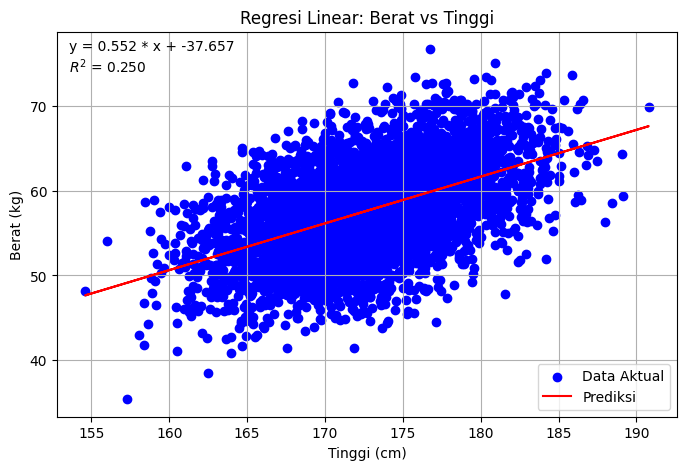

In [11]:
import matplotlib.pyplot as plt

#plot data scatter
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
#Garis regresi
plt.plot(X_test, y_pred, color="red", label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"

)
plt.legend()
plt.grid(True)
plt.show()

In [12]:
y_pred_test = model.predict(X_test)

#buat tabel hasil (tinggi, aktual, prediksi, dan eror)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,

})

#1). Selisih eror (positif)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

#2). Akurasi per-baris (100*(1-|error|/aktual))
denom = hasil["Berat aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762940,8.602940,82.849003
1,171.31,50.33,56.875710,6.545710,86.994417
2,169.29,58.22,55.761030,-2.458970,95.776417
3,163.30,58.92,52.455617,-6.464383,89.028542
4,170.52,63.06,56.439771,-6.620229,89.501698
...,...,...,...,...,...
4995,178.75,56.59,60.981264,4.391264,92.240212
4996,163.05,47.45,52.317662,4.867662,89.741493
4997,166.51,52.46,54.226965,1.766965,96.631786
4998,167.70,49.90,54.883633,4.983633,90.012759


Data Testing dari
Mahasiswa TI 2022

In [14]:
import pandas as pd

path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum_03/"

df = pd.read_csv(path +'/Data/Berat_TI_2022.csv', sep=',')
df

,Nama,Tinggi_cm,aktual_berat_kg
0,Rafa,168,58.5
1,Tiara,162,78.2
2,Tia,155,52.7
3,Keyla,160,70.3
4,Bani,183,65.8


In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Memanggil data set lewat gdrive - ensure path is defined
path = "/content/gdrive/MyDrive/Praktikum_ML/Praktikum_03/"

data = pd.read_csv(path +'/Data/Berat_TI_2022.csv', sep=',')

# Menambahkan konstanta untuk model regresi
X_test_const = sm.add_constant(data[['Tinggi_cm']])

# Make predictions using the model trained in cell G_F0SSmwezUS
y_pred = model.predict(X_test_const)
data['prediksi_kg']=y_pred
data["Selisih error (kg)"] = data["prediksi_kg"] - data["aktual_berat_kg"]
denom = data["aktual_berat_kg"].replace(0, np.nan)
data["Akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

,Nama,Tinggi_cm,aktual_berat_kg,prediksi_kg,Selisih error (kg),Akurasi (%)
0,Rafa,168,58.5,65.365692,6.865692,88.263774
1,Tiara,162,78.2,64.701462,-13.498538,82.738442
2,Tia,155,52.7,63.926526,11.226526,78.697294
3,Keyla,160,70.3,64.480052,-5.819948,91.721268
4,Bani,183,65.8,67.026268,1.226268,98.136370


Multiple Linear Regresi

In [16]:
import pandas as pd

#Buat data frame read data
df = pd.read_csv(path +'/Data/stunting_wasting_dataset.csv', sep=',')

#cetak
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [17]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [18]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)":"umur_bulan",
                        "Tinggi Badan (cm)":"tinggi_cm", "Berat Badan (kg)":"berat_kg"}).copy())

##Laki-laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bulan,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [19]:
#Hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

            berat_kg        jk  umur_bulan  tinggi_cm
berat_kg    1.000000  0.045797    0.665389   0.626005
jk          0.045797  1.000000    0.004046   0.073505
umur_bulan  0.665389  0.004046    1.000000   0.875869
tinggi_cm   0.626005  0.073505    0.875869   1.000000


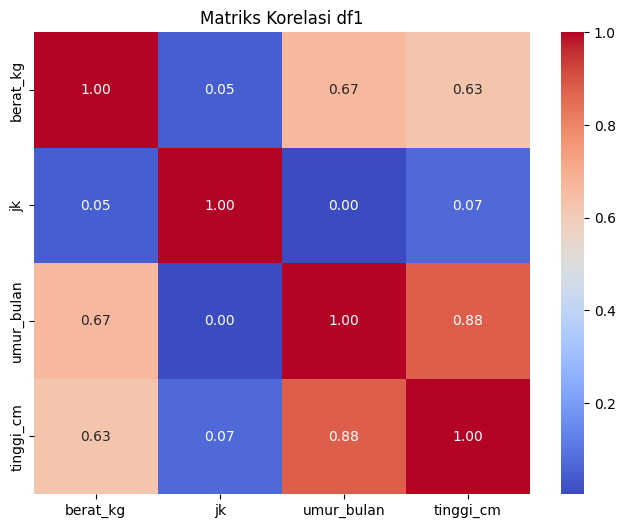

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

#Misal target (y)
y = df1["berat_kg"]

#Fitur (x) adalah umur tinggi
X = df1[["umur_bulan", "tinggi_cm"]]

#bagi data 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#etak pembagian
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

##cek apa sudah ada  constanta
X_train.head()

Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bulan,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [22]:
#tambahkan konstanta
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bulan,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [23]:
import statsmodels.api as sm
# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('========================')
print(model.params)
print('========================')
const = model.params['const']
x1_umur = model.params['umur_bulan']
x2_tinggi = model.params['tinggi_cm']
# print persamaan regresl
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

const         2.545617
umur_bulan    0.229719
tinggi_cm     0.054192
dtype: float64
y = 2.546 + 0.230*x1 + 0.054*x2


In [24]:
#Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Thu, 09 Oct 2025   Prob (F-statistic):               0.00
Time:                        04:14:33   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [25]:
#Tambah konstanta ke data uji
X_test_const = sm.add_constant(X_test)

#prediksi berat badan
y_pred_test = model.predict(X_test_const)

#Buat tabel hasi prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bulan"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat prediksi (kg)": y_pred_test
})

#1). selisih error positif
hasil["Selisih error (kg)"] = hasil["Berat prediksi (kg)"] - hasil["Berat aktual (kg)"]

#2). Akurasi per-baris
denom = hasil ["Berat aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat aktual (kg),Berat prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845
